In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
arabic_search_tweets = pd.read_csv('Search Approach/Arabic/EgyptianArabicSearchTweets3.csv')
arabic_search_tweets.drop('Unnamed: 0', axis=1, inplace=True)
arabic_search_tweets['method'] = 'Keyword Search'

In [4]:
arabic_profile_tweets = pd.read_csv('Profile Info Approach/Arabic/EgyptianArabicProfileInfoTweets.csv')
arabic_profile_tweets.drop('Unnamed: 0', axis=1, inplace=True)
arabic_profile_tweets['method'] = 'Profile Info'

In [5]:
arabic_nearby_tweets = pd.read_csv('Nearby Approach/Arabic/EgyptianArabicNearbyTweets.csv')
arabic_nearby_tweets['method'] = 'Nearby'
arabic_nearby_tweets.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
arabic_geo_tweets = pd.read_csv('Geotagged Approach/Arabic/EgyptianArabicGeoTweets.csv')
arabic_geo_tweets.drop('Unnamed: 0', axis=1,inplace=True)
arabic_geo_tweets['method'] = 'Geotagged'

In [7]:
arabic_tweets = pd.concat([arabic_geo_tweets,arabic_nearby_tweets,arabic_profile_tweets,arabic_search_tweets])
arabic_tweets.drop_duplicates(inplace=True)

In [8]:
arabic_tweets = arabic_tweets[arabic_tweets['method'] != 'Nearby'].reset_index(drop=True)

In [9]:
arabic_geocoded_tweets = pd.read_csv('Geotagged Approach/Arabic/EgyptianArabicGeoTweets.csv')
arabic_geocoded_tweets.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
arabic_grouped_geo = arabic_geocoded_tweets.groupby('governorate').count()

Text(0.5, 1.0, 'Top 5 governorates with tweets from the Geocode approach')

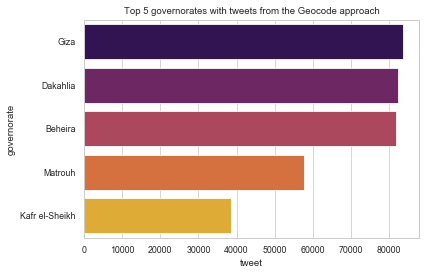

In [11]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.barplot(x='tweet',y=arabic_grouped_geo.sort_values('tweet',ascending=False).head(5).index,data=arabic_grouped_geo.sort_values('tweet',ascending=False).head(5),palette='inferno')
plt.title('Top 5 governorates with tweets from the Geocode approach')

In [12]:
governorates = pd.read_csv('Governorates.csv')

In [13]:
governorates.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
governorates['Urban Population'] = governorates['Population'] * (governorates['% Urban'] /100)
import math
governorates['Urban Population'] = governorates['Urban Population'].apply(math.floor)

In [15]:
governorates['Radius'] = (governorates['Area']/math.pi).apply(math.sqrt)

In [16]:
arabic_tweet_count = arabic_search_tweets.groupby('governorate').count()['tweet'].to_frame().reset_index()

In [17]:
arabic_tweet_count.rename({'governorate':'Name'}, axis=1, inplace=True)

In [18]:
governorates = pd.merge(governorates,arabic_tweet_count,on='Name')

In [19]:
governorates.rename({'tweet':'Tweet Count'}, axis=1, inplace=True)

In [23]:
corona_tweets = arabic_tweets[arabic_tweets['corona'] == True]

In [24]:
corona_gov = corona_tweets.groupby('governorate').count()

In [25]:
corona_gov_count = corona_gov['tweet'].to_frame().reset_index()

In [26]:
corona_gov_count.rename({'governorate':'Name'},axis=1,inplace=True)

In [27]:
governorates = pd.merge(governorates,corona_gov_count,on='Name')

In [28]:
governorates.rename({'tweet':'Corona Tweets'}, axis=1, inplace=True)

In [238]:
governorates['% Corona'] = ((governorates['Corona Tweets']/governorates['All Tweet Count'])*100)

In [239]:
governorates.sort_values('% Corona',ascending=False)

,Name,Abbr.,Native,Capital,Area,Population,Density,% Urban,lat,lng,Urban Population,Radius,Search Tweet Count,Corona Tweets,% Corona,Geo Tweet Count,Profile Info Tweet Count,Tweet Count No Geo,All Tweet Count
10,Luxor,UQS,الأقصر,Al-Uqṣur,2960,1250209,422.367905,37.8,25.695858,32.643592,472579,30.695232,4381,2122,22.629839,4306,690,5071,9377
8,Cairo,QAH,القاهرة,Al-Qāhirah,3085,9539673,3092.276499,100.0,30.077080,31.285909,9539673,31.336656,38054,10676,16.231584,15957,11762,49816,65773
13,Asyut,ASY,أسيوط,Asyūṭ,13720,4383289,319.481706,26.5,27.180956,31.183683,1161571,66.084882,4123,1060,10.419739,5926,124,4247,10173
16,Damietta,DMY,دمياط,Dumyāṭ,910,1496765,1644.796703,38.7,31.416477,31.813316,579248,17.019459,8024,3089,9.461819,22371,2252,10276,32647
19,Qena,QNA,قنا,Qinā,8980,3164281,352.369822,19.7,26.164179,32.726710,623363,53.464220,152,544,9.449366,2172,3433,3585,5757
21,South Sinai,SJN,جنوب سيناء,Aṭ-Ṭūr,31272,102018,3.262279,51.1,28.236381,33.625404,52131,99.770671,378,218,9.416847,1932,5,383,2315
3,Alexandria,ISK,الإسكندرية,Al-Iskandariyah,2300,5163750,2245.108696,98.8,31.215645,29.955266,5101785,27.057582,5773,1182,9.373513,378,6459,12232,12610
15,Port Said,BSD,بور سعيد,Būr Sa'īd,1345,749371,557.153160,100.0,31.256541,32.284115,749371,20.691225,3685,721,9.300826,4060,7,3692,7752
12,Aswan,ASW,أسوان,Aswān,62726,1473975,23.498629,42.3,24.093433,32.907038,623491,141.302179,4673,1116,8.500914,7399,1056,5729,13128
7,Al-Minya,MNY,المنيا,Al-Minyā,32279,5497095,170.299421,18.9,28.109884,30.750299,1038950,101.364317,3312,1182,7.313451,12591,259,3571,16162


In [31]:
arabic_geo_count = arabic_geo_tweets.groupby('governorate').count()['tweet'].to_frame().reset_index()

In [32]:
arabic_geo_count.rename({'governorate':'Name'}, axis=1, inplace=True)

In [33]:
governorates = pd.merge(governorates,arabic_geo_count,on='Name')

In [191]:
governorates.rename({'tweet':'Geo Tweet Count'}, axis=1, inplace=True)

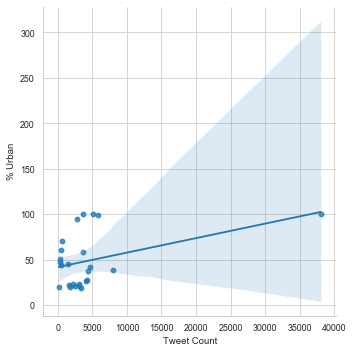

In [35]:
sns.lmplot(x='Tweet Count',y='% Urban',data=governorates,)

In [59]:
arabic_tweets.drop(83730, inplace=True)
arabic_tweets.reset_index(drop=True, inplace=True)

In [142]:
arabic_date_tweets = arabic_tweets.groupby('date').mean()

In [145]:
arabic_date_tweets.drop('2020-03-22',inplace=True)

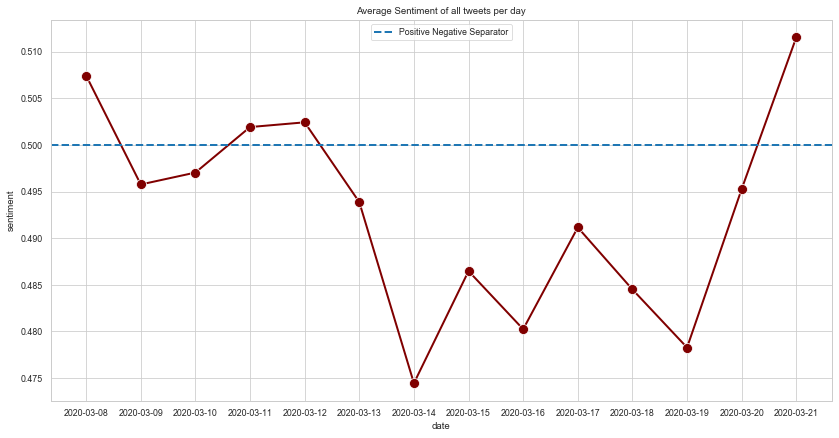

In [176]:
plt.figure(figsize=(14,7))
sns.lineplot(x=arabic_date_tweets.index,y='sentiment',data=arabic_date_tweets,lw=2,markersize=10,marker='o',color='maroon')
plt.title('Average Sentiment of all tweets per day')
plt.axhline(0.5,ls='--',lw=2,label='Positive Negative Separator')
plt.legend(loc='upper center')

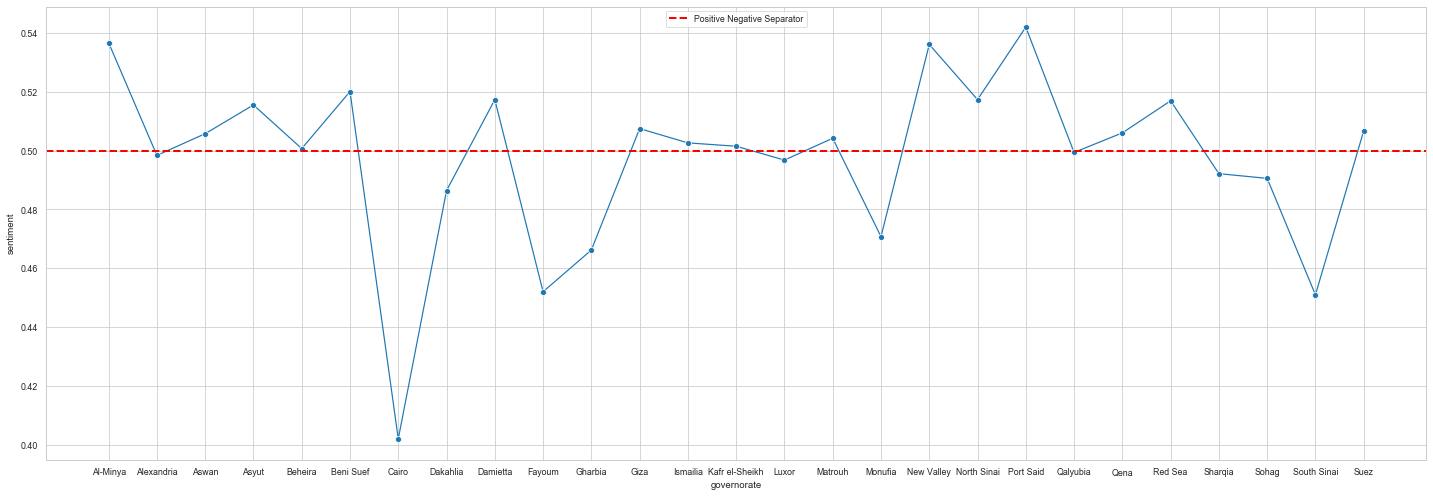

In [188]:
plt.figure(figsize=(20,7))
sns.lineplot(x=arabic_tweets.groupby('governorate').mean().index,y='sentiment',data=arabic_tweets.groupby('governorate').mean(),marker='o',markersize=6)
plt.axhline(0.5,ls='--',lw=2,label='Positive Negative Separator',color='red')
plt.legend(loc='upper center')
plt.tight_layout()

In [134]:
def gov_changer(gov):
    if gov == 'Az-Zaqaziq':
        return 'Sharqia'
    if gov == 'Tanta':
        return 'Gharbia'
    return gov

In [140]:
arabic_tweets['governorate'] = arabic_tweets['governorate'].apply(gov_changer)

In [160]:
corona_tweets.reset_index(drop=True,inplace=True)

In [165]:
corona_date_tweets = corona_tweets.groupby('date').mean()

Text(0.5, 1.0, 'Corona tweets average sentiment per day')

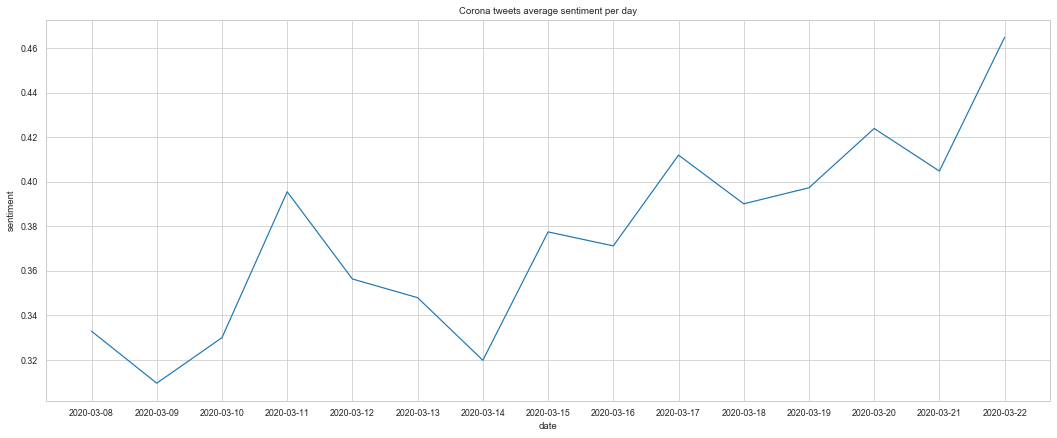

In [189]:
plt.figure(figsize=(18,7))
sns.lineplot(x=corona_date_tweets.index,y='sentiment',data=corona_date_tweets)
plt.title('Corona tweets average sentiment per day')

In [194]:
governorates.rename({'Tweet Count':'Search Tweet Count'}, axis=1,inplace=True)

In [203]:
arabic_profile_count = arabic_profile_tweets.groupby('governorate').count()['tweet'].to_frame().reset_index()

In [205]:
arabic_profile_count.rename({'governorate':'Name'},axis=1,inplace=True)

In [209]:
governorates = pd.merge(governorates,arabic_profile_count,on='Name')

In [213]:
governorates.rename({'tweet': 'Profile Info Tweet Count'},axis=1,inplace=True)

In [217]:
governorates

,Name,Abbr.,Native,Capital,Area,Population,Density,% Urban,lat,lng,Urban Population,Radius,Search Tweet Count,Corona Tweets,% Corona,Geo Tweet Count,Profile Info Tweet Count,Tweet Count No Geo
0,Dakahlia,DQH,الدقهلية,Al-Manṣūrah,3538,6492381,1835.042679,28.2,31.036373,31.380691,1830851,33.558611,4220,6086,144.218009,82291,1331,5551
1,Beheira,BHR,البحيرة,Damanhūr,9826,6171613,628.090067,19.5,31.032821,30.425270,1203464,55.925959,1808,4386,242.588496,81742,382,2190
2,Fayoum,FYM,الفيوم,Al-Fayyūm,6068,3596954,592.774225,22.5,29.309949,30.841804,809314,43.948884,1664,280,16.826923,2890,125,1789
3,Alexandria,ISK,الإسكندرية,Al-Iskandariyah,2300,5163750,2245.108696,98.8,31.215645,29.955266,5101785,27.057582,5773,1182,20.474623,378,6459,12232
4,Ismailia,ISM,الإسماعيلية,Al-Ismā'īliyah,5067,1303993,257.350109,45.4,30.604272,32.272252,592012,40.160630,1428,583,40.826331,7946,73,1501
5,Giza,JIZ,الجيزة,Al-Jīzah,13184,8632021,654.734603,58.6,30.008079,31.210931,5058364,64.781151,3626,6016,165.912852,83585,2347,5973
6,Monufia,MNF,المنوفية,Shibīn al-Kawm,2499,4301601,1721.328932,20.6,30.597200,30.987600,886129,28.203837,3141,1372,43.680357,16223,691,3832
7,Al-Minya,MNY,المنيا,Al-Minyā,32279,5497095,170.299421,18.9,28.109884,30.750299,1038950,101.364317,3312,1182,35.688406,12591,259,3571
8,Cairo,QAH,القاهرة,Al-Qāhirah,3085,9539673,3092.276499,100.0,30.077080,31.285909,9539673,31.336656,38054,10676,28.054869,15957,11762,49816
9,Qalyubia,QLY,القليوبية,Banhā,1124,5627420,5006.601423,44.7,30.459065,31.178577,2515456,18.915082,491,809,164.765784,14784,59,550


In [215]:
governorates['Tweet Count No Geo'] = governorates['Profile Info Tweet Count'] + governorates['Search Tweet Count']

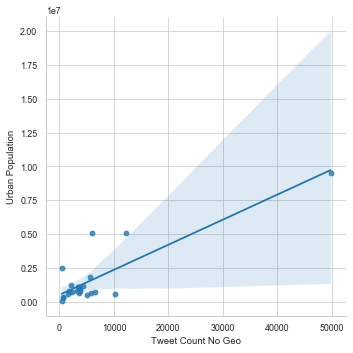

In [216]:
sns.lmplot(x='Tweet Count No Geo', y='Urban Population', data=governorates)
plt.xlim()

In [224]:
governorates['All Tweet Count'] = governorates['Search Tweet Count'] + governorates['Profile Info Tweet Count'] + governorates['Geo Tweet Count']

In [225]:
governorates

,Name,Abbr.,Native,Capital,Area,Population,Density,% Urban,lat,lng,Urban Population,Radius,Search Tweet Count,Corona Tweets,% Corona,Geo Tweet Count,Profile Info Tweet Count,Tweet Count No Geo,All Tweet Count
0,Dakahlia,DQH,الدقهلية,Al-Manṣūrah,3538,6492381,1835.042679,28.2,31.036373,31.380691,1830851,33.558611,4220,6086,144.218009,82291,1331,5551,87842
1,Beheira,BHR,البحيرة,Damanhūr,9826,6171613,628.090067,19.5,31.032821,30.425270,1203464,55.925959,1808,4386,242.588496,81742,382,2190,83932
2,Fayoum,FYM,الفيوم,Al-Fayyūm,6068,3596954,592.774225,22.5,29.309949,30.841804,809314,43.948884,1664,280,16.826923,2890,125,1789,4679
3,Alexandria,ISK,الإسكندرية,Al-Iskandariyah,2300,5163750,2245.108696,98.8,31.215645,29.955266,5101785,27.057582,5773,1182,20.474623,378,6459,12232,12610
4,Ismailia,ISM,الإسماعيلية,Al-Ismā'īliyah,5067,1303993,257.350109,45.4,30.604272,32.272252,592012,40.160630,1428,583,40.826331,7946,73,1501,9447
5,Giza,JIZ,الجيزة,Al-Jīzah,13184,8632021,654.734603,58.6,30.008079,31.210931,5058364,64.781151,3626,6016,165.912852,83585,2347,5973,89558
6,Monufia,MNF,المنوفية,Shibīn al-Kawm,2499,4301601,1721.328932,20.6,30.597200,30.987600,886129,28.203837,3141,1372,43.680357,16223,691,3832,20055
7,Al-Minya,MNY,المنيا,Al-Minyā,32279,5497095,170.299421,18.9,28.109884,30.750299,1038950,101.364317,3312,1182,35.688406,12591,259,3571,16162
8,Cairo,QAH,القاهرة,Al-Qāhirah,3085,9539673,3092.276499,100.0,30.077080,31.285909,9539673,31.336656,38054,10676,28.054869,15957,11762,49816,65773
9,Qalyubia,QLY,القليوبية,Banhā,1124,5627420,5006.601423,44.7,30.459065,31.178577,2515456,18.915082,491,809,164.765784,14784,59,550,15334


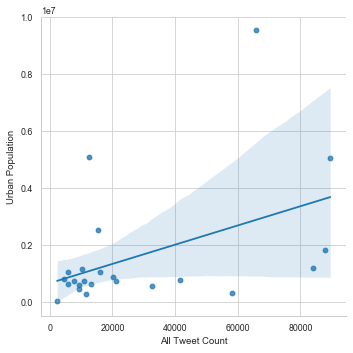

In [226]:
sns.lmplot(x='All Tweet Count', y='Urban Population', data=governorates)

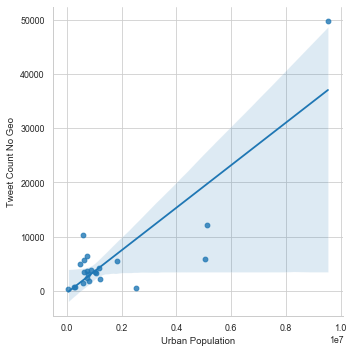

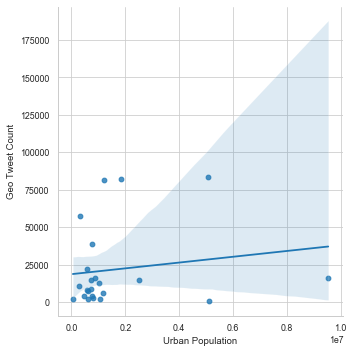

In [236]:
sns.lmplot(y='Tweet Count No Geo', x='Urban Population', data=governorates)
sns.lmplot(y='Geo Tweet Count', x='Urban Population', data=governorates)

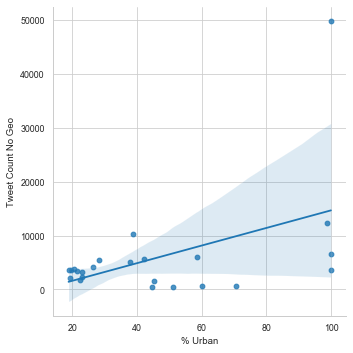

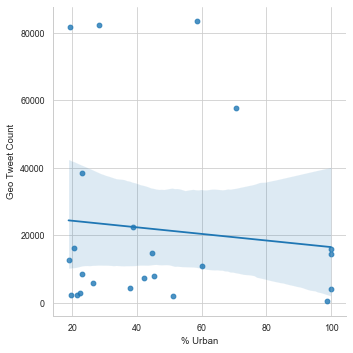

In [237]:
sns.lmplot(y='Tweet Count No Geo', x='% Urban', data=governorates)
sns.lmplot(y='Geo Tweet Count', x='% Urban', data=governorates)

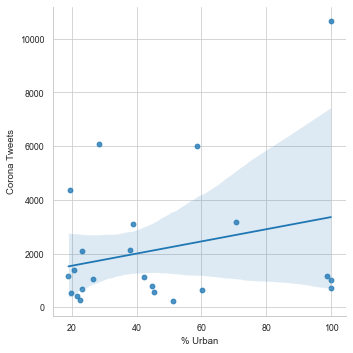

In [240]:
sns.lmplot(y='Corona Tweets', x='% Urban', data=governorates)

In [253]:
from wordcloud import WordCloud

In [318]:
comment_words = ''

for val in corona_tweets.clean_tweet: 
  
    # split the value 
    tokens = val.split() 
      
    comment_words += " ".join(tokens)+" "

In [319]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,font_path='C:\WINDOWS\FONTS\CALIBRIL.TTF').generate(comment_words) 

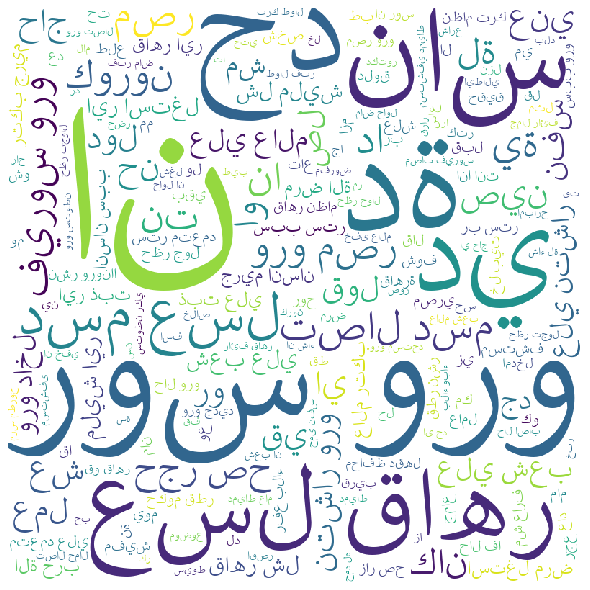

In [320]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [264]:
comment_words[1]

'ل'

In [266]:
corona_tweets['normal_tweet'] = corona_tweets['tweet']

,date,time,username,name,place,tweet,urls,replies_count,retweets_count,likes_count,hashtags,near,geo,governorate,language,method,corona,clean_tweet,sentiment
0,2020-03-22,01:29:54,arwaaaa__,ARWA,NaN,الكلام اللي طلع أول ما حصل التفشي بتاع الفيروس...,[],0,0,0,[],NaN,"24.093432999999997,32.907038,141.30217946218823km",Aswan,Arabic,Geotagged,True,كلام طلع اول حصل تفش تاع فيروس ان مش يعمل مشاك...,0
1,2020-03-22,01:23:09,arwaaaa__,ARWA,NaN,هل خذلك العمر أم أن الفيروس كان متسسلا 😂😂😂😂😂😂😂...,[],0,0,2,[],NaN,"24.093432999999997,32.907038,141.30217946218823km",Aswan,Arabic,Geotagged,True,خذل عمر ام ان فيروس كان متسسل كوميك ظيع شتيم م...,0
2,2020-03-22,00:18:03,nawaweeey,#Stayhome.,NaN,يا تلاقوا علاج للكورونا يا حد يخليني ابطل أكل ...,[],0,0,3,[],NaN,"24.093432999999997,32.907038,141.30217946218823km",Aswan,Arabic,Geotagged,True,لاق علاج كورون حد خلي بطل سبب ام ملل دة,0
3,2020-03-21,23:57:17,_daliagamal,الفن,NaN,خايفة على العالم والله آخر مرة طلعتها طلعت شعا...,[],1,0,0,[],NaN,"24.093432999999997,32.907038,141.30217946218823km",Aswan,Arabic,Geotagged,True,خايف علي عالم لة اخر مرة طلع طلع شعاع دا ضرب ن...,0
4,2020-03-21,23:57:09,roiuov98dhqijkj,💖المعتصم بالله محمد 💖,NaN,التعقيم اهم حاجه والحلاق النضيف نضيف,[],1,0,1,[],NaN,"24.093432999999997,32.907038,141.30217946218823km",Aswan,Arabic,Geotagged,True,تعقيم حاج حلاق نضيف ضيف,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56707,2020-03-08,09:48:53,mamin_13_3,mohamed amen,NaN,واحد من الاجانب يحكي عن رحلته السياحية في مصر ...,['https://twitter.com/mattswider/status/123649...,0,0,0,[],NaN,NaN,Matrouh,Arabic,Keyword Search,True,حد اجانب حكي رحل سياح مصر حتي قل اقصر مرسي مطر...,0
56708,2020-03-08,09:28:11,injyalqadi,إنچي القاضي,NaN,ثريد طويل يحكي عن رحلته السياحية في مصر حتى نق...,['https://twitter.com/mattswider/status/123649...,6,90,144,[],NaN,NaN,Matrouh,Arabic,Keyword Search,True,ثريد طويل حكي رحل سياح مصر حتي قل اقصر مرسي مط...,0
56709,2020-03-08,09:02:19,atefsokni,Atef عاطف,NaN,حتى الحجر الصحي للمصابين بفيروس #كورونا دايرين...,[],0,0,5,['#كورونا'],NaN,NaN,Matrouh,Arabic,Keyword Search,True,حتي حجر صح مصاب فيروس ورو دايري مرسي مطروح عني...,0
56710,2020-03-08,08:09:28,rashidalmethen,Rashid_Almethen,NaN,مصر مرسي مطروح \n\nنقل مصابى كورونا في الأقصر ...,[],11,40,31,[],NaN,NaN,Matrouh,Arabic,Keyword Search,True,مصر مرس مطروح قل مصابي ورو اقصر اسعاف طائر صول...,0


In [282]:
stopwords_normal = list(map(normalize_tweet_ar,stopwords))

In [288]:
stopwords_normal.append('و')
stopwords_normal.append('دة')
stopwords_normal.append('اللي')

In [355]:
corona_tweets['normal_tweet'] = corona_tweets['tweet'].apply(normalize_tweet_ar)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [302]:
from itertools import chain

In [409]:
comment_words = []
for row in corona_tweets.normal_tweet:
    row = row.split()
    comment_words.append(row)
comment_words = list(chain.from_iterable(comment_words)) 
comment_words = ' '.join(comment_words)

In [313]:
from arabic_reshaper import reshape
from collections import Counter

In [314]:
from bidi.algorithm import get_display

Text(0.5, 1, 'Most common words mentioned in COVID-19 tweets')

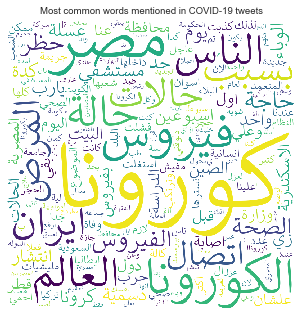

In [414]:
rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(comment_words.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(300)}

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,font_path='C:\WINDOWS\FONTS\CALIBRIL.TTF').generate_from_frequencies(counts)
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Most common words mentioned in COVID-19 tweets')

In [333]:
stopwords_normal = stopwords_normal+(list(governorates['Native']))

In [334]:
stopwords_normal.append('دي')
stopwords_normal.append('احنا')
stopwords_normal.append('مش')

In [335]:
stopwords_normal.append('عشان')


In [339]:
stopwords_normal.append('ف')
stopwords_normal.append('الله')
stopwords_normal.append('ربنا')
stopwords_normal.append('اللهم')

In [343]:
stopwords_normal.append('دا')

In [348]:
stopwords_normal.append('كلة')
stopwords_normal.append('والله')
stopwords_normal.append('يعني')
stopwords_normal.append('ع')

In [354]:
stopwords_normal.append('الاقصر')

In [358]:
arabic_tweets['normal_tweet'] = arabic_tweets['tweet'].apply(normalize_tweet_ar)

In [359]:
comment_words = []
for row in arabic_tweets.normal_tweet:
    row = row.split()
    comment_words.append(row)
comment_words = list(chain.from_iterable(comment_words)) 
comment_words = ' '.join(comment_words)

Text(0.5, 1, 'Most common words mentioned in all tweets')

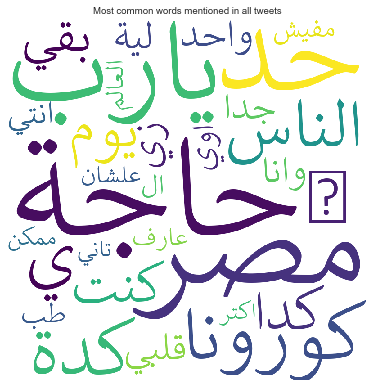

In [360]:
rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(comment_words.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(30)}

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,font_path='C:\WINDOWS\FONTS\CALIBRIL.TTF').generate_from_frequencies(counts)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Most common words mentioned in all tweets')

In [369]:
arabic_gov_sentiment = arabic_tweets.groupby('governorate').mean()['sentiment'].to_frame().reset_index().rename({'governorate':'Name'},axis=1)

In [371]:
governorates = pd.merge(governorates,arabic_gov_sentiment,on='Name')

In [375]:
governorates.rename({'sentiment': 'Avg Sentiment'}, axis=1,inplace=True)

In [377]:
governorates.sort_values('Avg Sentiment')

,Name,Abbr.,Native,Capital,Area,Population,Density,% Urban,lat,lng,Urban Population,Radius,Search Tweet Count,Corona Tweets,% Corona,Geo Tweet Count,Profile Info Tweet Count,Tweet Count No Geo,All Tweet Count,Avg Sentiment
8,Cairo,QAH,القاهرة,Al-Qāhirah,3085,9539673,3092.276499,100.0,30.077080,31.285909,9539673,31.336656,38054,10676,16.231584,15957,11762,49816,65773,0.402004
21,South Sinai,SJN,جنوب سيناء,Aṭ-Ṭūr,31272,102018,3.262279,51.1,28.236381,33.625404,52131,99.770671,378,218,9.416847,1932,5,383,2315,0.450972
2,Fayoum,FYM,الفيوم,Al-Fayyūm,6068,3596954,592.774225,22.5,29.309949,30.841804,809314,43.948884,1664,280,5.984185,2890,125,1789,4679,0.452020
6,Monufia,MNF,المنوفية,Shibīn al-Kawm,2499,4301601,1721.328932,20.6,30.597200,30.987600,886129,28.203837,3141,1372,6.841187,16223,691,3832,20055,0.470729
0,Dakahlia,DQH,الدقهلية,Al-Manṣūrah,3538,6492381,1835.042679,28.2,31.036373,31.380691,1830851,33.558611,4220,6086,6.928349,82291,1331,5551,87842,0.486385
20,Sohag,SWJ,سوهاج,Sawhāj,11218,4967409,442.807007,21.4,26.556952,31.694785,1063025,59.756174,2562,417,7.308097,2325,819,3381,5706,0.490536
10,Luxor,UQS,الأقصر,Al-Uqṣur,2960,1250209,422.367905,37.8,25.695858,32.643592,472579,30.695232,4381,2122,22.629839,4306,690,5071,9377,0.496747
3,Alexandria,ISK,الإسكندرية,Al-Iskandariyah,2300,5163750,2245.108696,98.8,31.215645,29.955266,5101785,27.057582,5773,1182,9.373513,378,6459,12232,12610,0.498335
9,Qalyubia,QLY,القليوبية,Banhā,1124,5627420,5006.601423,44.7,30.459065,31.178577,2515456,18.915082,491,809,5.275858,14784,59,550,15334,0.499348
1,Beheira,BHR,البحيرة,Damanhūr,9826,6171613,628.090067,19.5,31.032821,30.425270,1203464,55.925959,1808,4386,5.225659,81742,382,2190,83932,0.500655


Text(0.5, 1.0, 'Least happy governorates in the period')

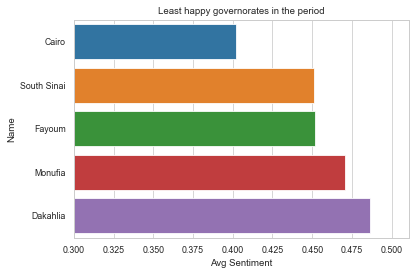

In [385]:
sns.barplot(x='Avg Sentiment',y='Name',data=governorates.sort_values('Avg Sentiment').head(5))
plt.xlim(0.3)
plt.title('Least happy governorates in the period')

Text(0.5, 1.0, 'Most happy governorates in the period')

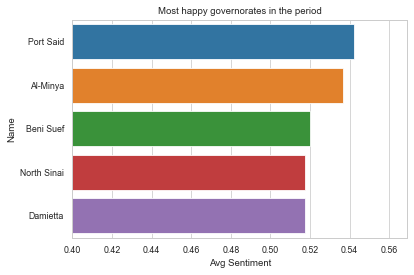

In [389]:
sns.barplot(x='Avg Sentiment',y='Name',data=governorates.sort_values('Avg Sentiment',ascending=False).head(5))
plt.xlim(0.4)
plt.title('Most happy governorates in the period')

In [390]:
def sentiment_changer(sentiment):
    if sentiment >= 0.5 :
        return 'Positive'
    else:
        return 'Negative'

In [393]:
governorates['Avg Polarity'] = governorates['Avg Sentiment'].apply(sentiment_changer)

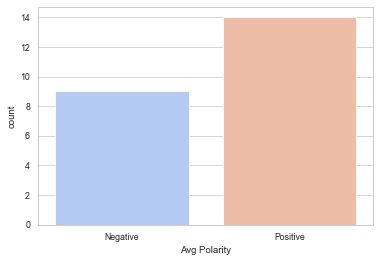

In [397]:
sns.countplot(x='Avg Polarity',data=governorates,palette='coolwarm')

In [398]:
governorates

,Name,Abbr.,Native,Capital,Area,Population,Density,% Urban,lat,lng,...,Radius,Search Tweet Count,Corona Tweets,% Corona,Geo Tweet Count,Profile Info Tweet Count,Tweet Count No Geo,All Tweet Count,Avg Sentiment,Avg Polarity
0,Dakahlia,DQH,الدقهلية,Al-Manṣūrah,3538,6492381,1835.042679,28.2,31.036373,31.380691,...,33.558611,4220,6086,6.928349,82291,1331,5551,87842,0.486385,Negative
1,Beheira,BHR,البحيرة,Damanhūr,9826,6171613,628.090067,19.5,31.032821,30.425270,...,55.925959,1808,4386,5.225659,81742,382,2190,83932,0.500655,Positive
2,Fayoum,FYM,الفيوم,Al-Fayyūm,6068,3596954,592.774225,22.5,29.309949,30.841804,...,43.948884,1664,280,5.984185,2890,125,1789,4679,0.452020,Negative
3,Alexandria,ISK,الإسكندرية,Al-Iskandariyah,2300,5163750,2245.108696,98.8,31.215645,29.955266,...,27.057582,5773,1182,9.373513,378,6459,12232,12610,0.498335,Negative
4,Ismailia,ISM,الإسماعيلية,Al-Ismā'īliyah,5067,1303993,257.350109,45.4,30.604272,32.272252,...,40.160630,1428,583,6.171271,7946,73,1501,9447,0.502593,Positive
5,Giza,JIZ,الجيزة,Al-Jīzah,13184,8632021,654.734603,58.6,30.008079,31.210931,...,64.781151,3626,6016,6.717435,83585,2347,5973,89558,0.507442,Positive
6,Monufia,MNF,المنوفية,Shibīn al-Kawm,2499,4301601,1721.328932,20.6,30.597200,30.987600,...,28.203837,3141,1372,6.841187,16223,691,3832,20055,0.470729,Negative
7,Al-Minya,MNY,المنيا,Al-Minyā,32279,5497095,170.299421,18.9,28.109884,30.750299,...,101.364317,3312,1182,7.313451,12591,259,3571,16162,0.536629,Positive
8,Cairo,QAH,القاهرة,Al-Qāhirah,3085,9539673,3092.276499,100.0,30.077080,31.285909,...,31.336656,38054,10676,16.231584,15957,11762,49816,65773,0.402004,Negative
9,Qalyubia,QLY,القليوبية,Banhā,1124,5627420,5006.601423,44.7,30.459065,31.178577,...,18.915082,491,809,5.275858,14784,59,550,15334,0.499348,Negative


In [405]:
corona_tweets['governorate'] = corona_tweets['governorate'].apply(gov_changer)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [407]:
corona_tweets['method'].unique()

array(['Geotagged', 'Profile Info', 'Keyword Search'], dtype=object)